# Proyecto 2: Análisis Exploratorio
**Facultad de Ingeniería** – CC3084 Data Science (Semestre II, 2025)

**Tema: Procesamiento de Lenguaje Natural**

**Reto seleccionado:** Jigsaw – Agile Community Rules Classification

**Fuente**: Kaggle Competition (2025)

**Integrantes:**

- Derek Fabian Arreaga Kelson | 22537
- Mónica Alejandra Salvatierra Chacón | 22249
- Sofía Mishell Velásquez Mérida | 22049
- Paula Rebeca Barillas Alvarez | 22764
## Librerías principales para análisis de datos y visualización

In [1]:
# Librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para texto
import re
import string
from wordcloud import WordCloud
from collections import Counter

# Configuración estética
plt.style.use('seaborn-v0_8')
sns.set_palette("coolwarm")
pd.set_option('display.max_colwidth', 200)

## 0. Cargar los datos

In [2]:
# Cargar datasets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')

# Mostrar dimensiones
print("Tamaño del dataset de entrenamiento:", train.shape)
print("Tamaño del dataset de prueba:", test.shape)
print("Tamaño del archivo de submission:", sample.shape)

# Vista general
train.head()


Tamaño del dataset de entrenamiento: (2029, 9)
Tamaño del dataset de prueba: (10, 8)
Tamaño del archivo de submission: (10, 2)


,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here to know more!,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",Futurology,"If you could tell your younger self something different about sex, what would that be?\n\ni AM IN A CONTEST TO WIN FUNDING FOR MY SEX POSITIVE FILM: VOTE HERE:\n\nhttp://sheknows.offerpop.com/camp...",hunt for lady for jack off in neighbourhood http://url.inmusi.com/gakq,Watch Golden Globe Awards 2017 Live Online in HD Coverage without ADS (VIP STREAMS)\n=\n\nHD STREAM QUALITY >>> [WATCH LINK1](http://forum.submitexpress.com/viewtopic.php?f=9&t=215858)\n=\n\nHD BR...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/STREAM:\n\nhttp://music.theblacksmithed.com/download/birds/",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstreams247.com/astra-giurgiu-vs-fc-austria-wien/),"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",soccerstreams,[I wanna kiss you all over! Stunning!](http://www.oilflush.life/2017/01/26/6/),"LOLGA.COM is One of the First Professional Online Gold sites. By Now, As A Game Gold Seller, we've over more than 5 yrs Of Experience And Can Pass That On To Our Customers.","#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTube Search Beanie 864 Click Link BELOW To Hear Hit Single\n ""Ah Man"" \n Beanie 864 FEAT King Kota \n (King Kota Is Only 15!) Lit 🌡🔥👍💵💯Fr Fr \nhttps://...",[15 Amazing Hidden Features Of Google Search You Probably Don’t Know](http://www.madpeoples.com/2017/01/02 No one would argue the fact that Google is one of the most useful sihttp://www.madpeople...,0
2,2,Lol. Try appealing the ban and say you won't do it again.,No legal advice: Do not offer or request legal advice.,pcmasterrace,"Don't break up with him or call the cops. If you are willing to get beat up by him to stay with him, he is obviously a real winner and you know it, so you shouldn't leave him.",It'll be dismissed: https://en.wikipedia.org/wiki/New_York_Times_Co._v._Sullivan\n\nThe first amendment law here is SUPER settled.,Where is there a site that still works where you can jump the GPS. Is there a FAQ to do this with iPhone or Mac?,"Because this statement of his is true. It isn't freedom of the press, it's libel. And because of this, your post serves as a promotion for Trump. Reported.",1
3,3,she will come your home open her legs with and you http://sh.ors.it/PALI2,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",sex,Selling Tyrande codes for 3€ to paypal. PM. \nhttp://imgur.com/a/IMARW,tight pussy watch for your cock get her at this point http://macanasmagazine.com/yourls/hnof,NSFW(obviously) http://spankbang.com/iy3u/video/marica+hase+mirrors+edge,Good News ::Download WhatsApp 2.16.230 APK for Android – Latest Version,1
4,4,code free tyrande --->>> [Imgur](http://i.imgur.com/KlvssCl.png)\n\nfor you and your friend 2 codes for 4 dollars https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=UN4E27AG7BWKS...,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",hearthstone,wow!! amazing reminds me of the old days.Well Do you desire a great spell caster and a herbal doctor to help you solve any problem you are going through? i am a proud testimony of what king favou...,seek for lady for sex in around http://p77.pl/12yb9,must be watch movie https://sites.google.com/site/greatescape1963xx/-jagten-2012-full-movie,"We're streaming Pokemon Veitnamese Crystal RIGHT NOW, come watch https://www.twitch.tv/adandyguyinspace55.",1


## 1. Descripción general del conjunto de datos

El dataset **Jigsaw – Agile Community Rules Classification** contiene comentarios de Reddit etiquetados según si violan o no las reglas de cada subreddit.  
Cada fila representa un comentario con su texto (`body`), la regla asociada (`rule`), el subreddit de origen (`subreddit`), ejemplos positivos y negativos, y la etiqueta binaria `rule_violation`.

In [3]:
# Tipos de datos y valores faltantes
train.info()

# Resumen estadístico general
train.describe(include='all').T

# Conteo de valores nulos
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              2029 non-null   int64 
 1   body                2029 non-null   object
 2   rule                2029 non-null   object
 3   subreddit           2029 non-null   object
 4   positive_example_1  2029 non-null   object
 5   positive_example_2  2029 non-null   object
 6   negative_example_1  2029 non-null   object
 7   negative_example_2  2029 non-null   object
 8   rule_violation      2029 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 142.8+ KB


row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
rule_violation        0
dtype: int64

**Interpretación:**
- El conjunto de entrenamiento contiene **2029 observaciones** y **9 columnas**.  
- No se identifican valores nulos; todos los campos están completos.  
- Las variables son mayormente de tipo `object` (texto) y `int` (etiqueta binaria).
- El dataset de prueba cuenta con 10 observaciones y 8 columnas, mientras que el archivo `sample_submission.csv` tiene 10 filas con el formato de envío requerido.

El dataset es compacto, limpio y adecuado para comenzar un análisis exploratorio centrado en patrones de texto y relaciones entre las reglas, los subreddits y las violaciones detectadas.

------
## 2. Distribución de la variable objetivo (`rule_violation`)

Esta variable indica si un comentario violó (`1`) o no (`0`) una regla del subreddit.  
El objetivo principal es analizar la proporción de casos positivos y negativos.


C:\Users\50250\AppData\Local\Temp\ipykernel_26008\422153347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rule_violation', data=train, palette='coolwarm')


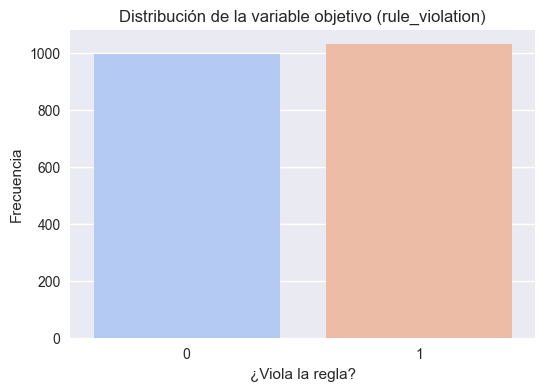

rule_violation
1    0.508132
0    0.491868
Name: proportion, dtype: float64

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='rule_violation', data=train, palette='coolwarm')
plt.title("Distribución de la variable objetivo (rule_violation)")
plt.xlabel("¿Viola la regla?")
plt.ylabel("Frecuencia")
plt.show()

train['rule_violation'].value_counts(normalize=True)

- La proporción es **casi balanceada**: aproximadamente 50.8% violan una regla y 49.1% no lo hacen.  
- Esto es positivo para el modelado posterior, ya que evita sesgos hacia una sola clase.

El dataset no presenta un desbalance significativo, lo que facilita el entrenamiento de modelos de clasificación binaria sin necesidad inicial de técnicas de balanceo como oversampling o undersampling.

---
## 3. Subreddits más frecuentes

El gráfico de barras muestra los **15 subreddits con mayor número de comentarios** en el dataset.



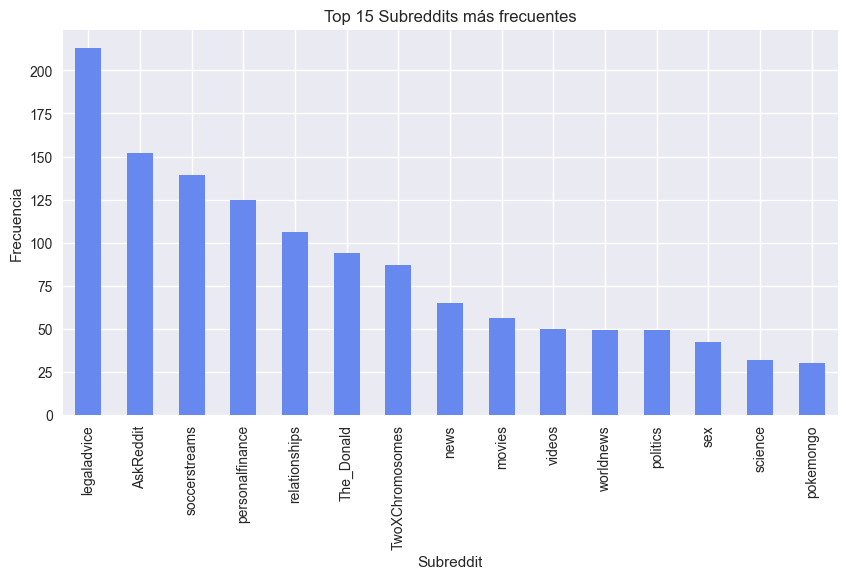

In [13]:
# Recuento de subreddits
plt.figure(figsize=(10,5))
train['subreddit'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Subreddits más frecuentes")
plt.xlabel("Subreddit")
plt.ylabel("Frecuencia")
plt.show()


- Los subreddits más representativos son **r/legaladvice**, **r/AskReddit**, y **r/soccerstreams**.  
- La mayor concentración de datos proviene de **r/legaladvice**, con más de 200 comentarios, seguido de foros de discusión general o entretenimiento.  
- Esto sugiere que los temas legales y las solicitudes de consejo son especialmente relevantes en la detección de violaciones.

Existe una concentración temática en comunidades donde las normas son estrictas (por ejemplo, prohibición de asesoría legal o autopromoción), lo cual influirá en los patrones lingüísticos del modelo.

---

## 4. Reglas más comunes

El gráfico representa las **reglas más citadas en los comentarios analizados**.


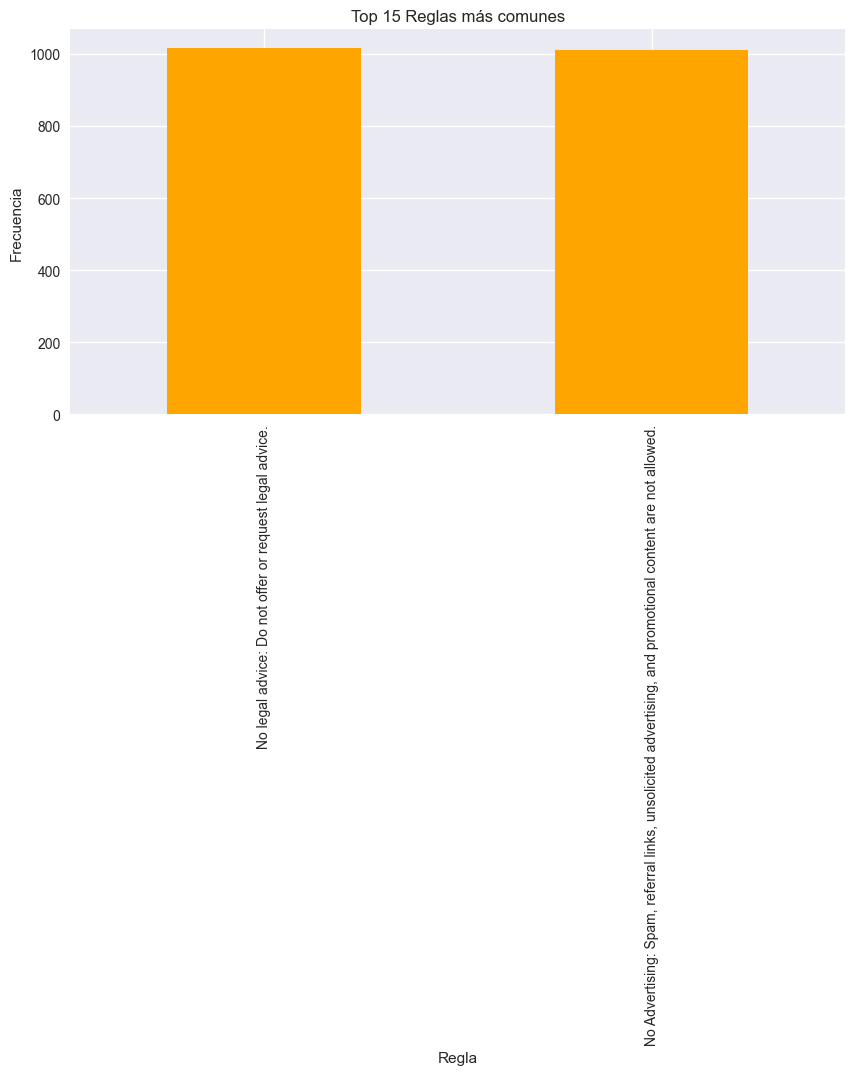

In [14]:
# Recuento de reglas
plt.figure(figsize=(10,5))
train['rule'].value_counts().head(15).plot(kind='bar', color='orange')
plt.title("Top 15 Reglas más comunes")
plt.xlabel("Regla")
plt.ylabel("Frecuencia")
plt.show()

- Se destacan principalmente dos reglas:
  1. *“No legal advice: Do not offer or request legal advice.”*  
  2. *“No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.”*
- Ambas aparecen con frecuencia similar (≈1000 casos cada una).

El modelo deberá distinguir entre **violaciones por asesoría legal** y **publicidad o spam**, categorías con contextos y vocabularios muy distintos. Esto sugiere la necesidad de enfoques de PLN sensibles al contexto.

---

## 5. Distribución de longitud de los comentarios

El boxplot compara la longitud (en número de palabras) entre comentarios que violan o no las reglas.



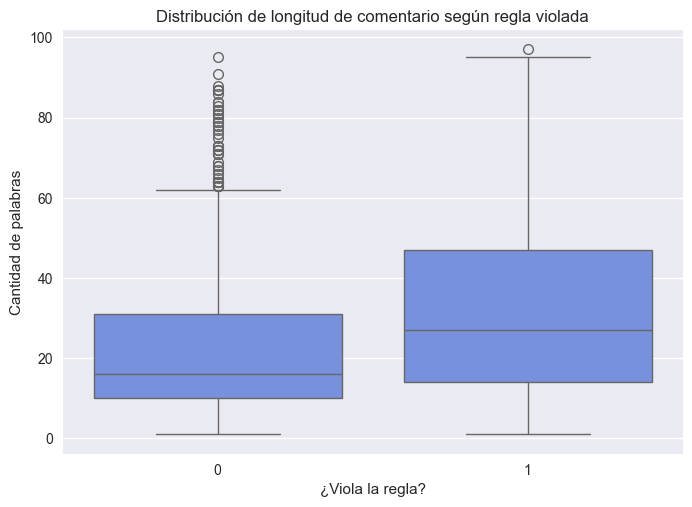

comment_length                                               \
                        count       mean        std  min   25%   50%   75%   
rule_violation                                                               
0                       998.0  23.134269  18.667550  1.0  10.0  16.0  31.0   
1                      1031.0  32.637245  22.487026  1.0  14.0  27.0  47.0   

                      
                 max  
rule_violation        
0               95.0  
1               97.0

In [7]:
train['comment_length'] = train['body'].apply(lambda x: len(str(x).split()))
sns.boxplot(x='rule_violation', y='comment_length', data=train)
plt.title("Distribución de longitud de comentario según regla violada")
plt.xlabel("¿Viola la regla?")
plt.ylabel("Cantidad de palabras")
plt.show()

train[['comment_length', 'rule_violation']].groupby('rule_violation').describe()

- Los comentarios que **violan reglas** son en promedio **más largos (≈33 palabras)** que los que no lo hacen (≈23 palabras).  
- Existe mayor dispersión y presencia de outliers en los comentarios no violatorios, lo que sugiere diversidad en estilos y extensiones.

La longitud del comentario podría ser un **predictor débilmente correlacionado** con la violación de reglas, ya que los textos más largos tienden a incluir más contexto, argumentos o lenguaje promocional.

---




## Limpieza y preprocesamiento de texto

In [8]:
def limpiar_texto(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # eliminar URLs
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  # eliminar puntuación
    text = re.sub(r'\s+', ' ', text).strip()  # espacios múltiples
    return text

train['clean_body'] = train['body'].apply(limpiar_texto)

## 6. Nube de palabras – Comentarios que violan reglas
La nube de palabras visualiza los términos más frecuentes en los comentarios etiquetados como violatorios.

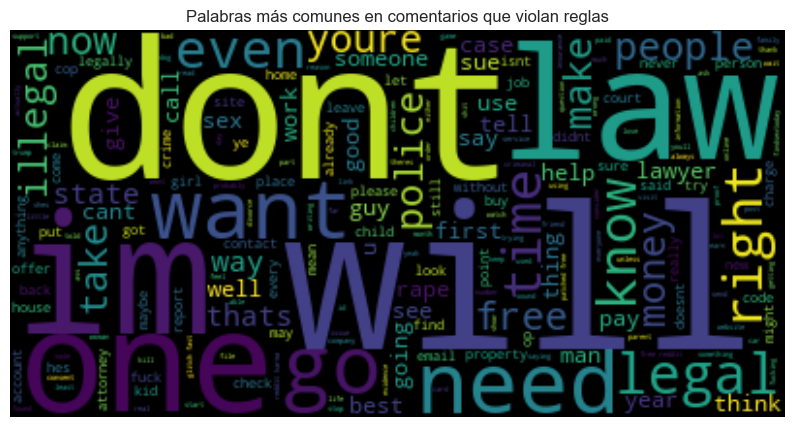

In [ ]:
violaciones = ' '.join(train[train['rule_violation']==1]['clean_body'])
no_violaciones = ' '.join(train[train['rule_violation']==0]['clean_body'])

# Nube de palabras para comentarios que violan reglas
plt.figure(figsize=(10,6))
WordCloud(width=800, height=400, background_color='black').generate(violaciones)
plt.imshow(WordCloud().generate(violaciones), interpolation='bilinear')
plt.axis('off')
plt.title("Palabras más comunes en comentarios que violan reglas")
plt.show()

- Destacan palabras como **“law”, “illegal”, “police”, “need”, “want”, “help”, “money”, “right”**, asociadas a temas legales y solicitudes de asesoría.  
- Esto confirma que los comentarios violatorios están fuertemente ligados a consultas o discusiones legales directas, prohibidas en subreddits como *r/legaladvice*.

El lenguaje de los comentarios infractores tiene un tono **imperativo o consultivo**, con un campo semántico asociado a problemas legales y peticiones personales.

---

## 7. Nube de palabras – Comentarios que no violan reglas

La segunda nube de palabras muestra las palabras predominantes en comentarios **que no violan reglas**.


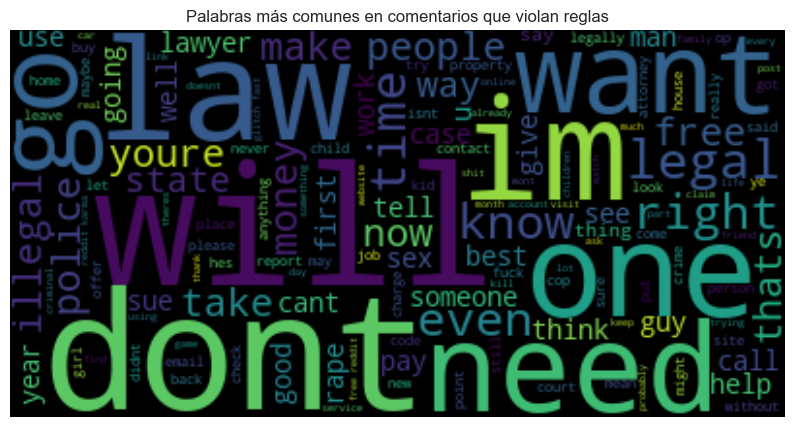

In [10]:
violaciones = ' '.join(train[train['rule_violation']==1]['clean_body'])
no_violaciones = ' '.join(train[train['rule_violation']==0]['clean_body'])

# Nube de palabras para comentarios que violan reglas
plt.figure(figsize=(10,6))
WordCloud(width=800, height=400, background_color='black').generate(violaciones)
plt.imshow(WordCloud().generate(violaciones), interpolation='bilinear')
plt.axis('off')
plt.title("Palabras más comunes en comentarios que violan reglas")
plt.show()

- Aunque aparecen algunos términos similares (“law”, “will”, “need”), su contexto tiende a ser más informativo o hipotético.  
- Los comentarios no violatorios usan construcciones más neutrales y menos personales.

Los textos no infractores tienden a mantener un lenguaje más **descriptivo y menos directo**, lo cual puede servir para construir representaciones vectoriales diferenciadas en modelos supervisados.

---

## 8. Relación entre Subreddit y Violación de Reglas
El gráfico apilado muestra cómo se distribuyen los comentarios violatorios y no violatorios por subreddit.


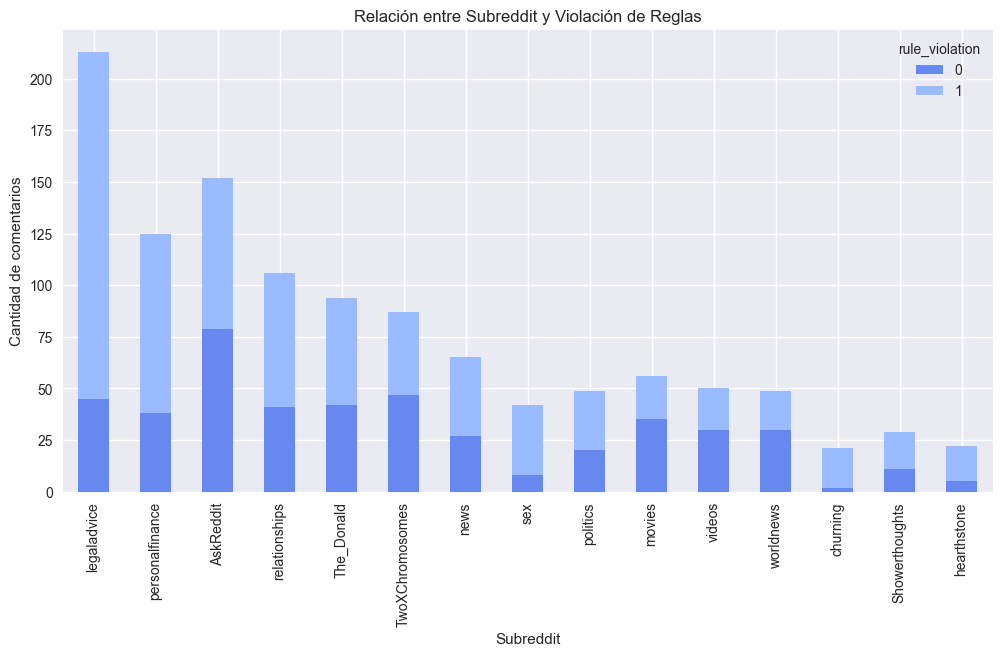

In [11]:
pivot = pd.crosstab(train['subreddit'], train['rule_violation'])
pivot = pivot.sort_values(by=1, ascending=False).head(15)

pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Relación entre Subreddit y Violación de Reglas")
plt.xlabel("Subreddit")
plt.ylabel("Cantidad de comentarios")
plt.show()

- En **r/legaladvice** predominan los comentarios que **violan reglas**, lo que es coherente con su prohibición explícita de brindar asesoría legal.  
- Subreddits como **r/AskReddit** o **r/personalfinance** presentan distribuciones más equilibradas.  
- Comunidades como **r/movies** o **r/videos** registran menos violaciones.

El contexto del subreddit es una **variable altamente informativa**. Algunos foros tienen una propensión natural a las infracciones por la temática que tratan.

---

# 9. Correlación entre longitud del comentario y violación de reglas
El mapa de calor representa la correlación entre `comment_length` y `rule_violation`.

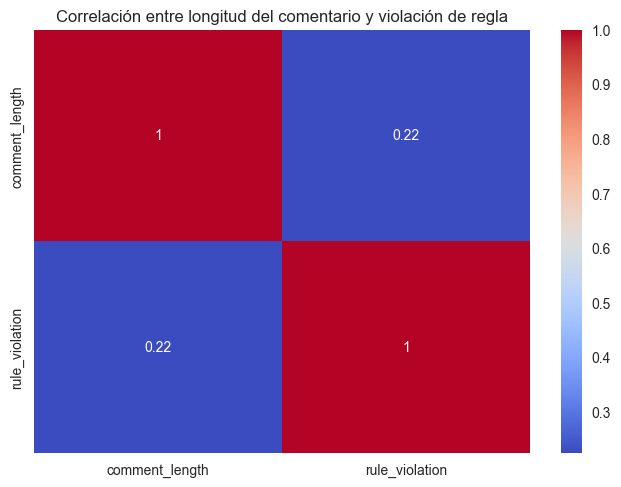

In [12]:
corr = train[['comment_length', 'rule_violation']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlación entre longitud del comentario y violación de regla")
plt.show()

- La correlación es **positiva pero baja (≈0.22)**, lo que indica que, aunque los comentarios más largos tienden a violar más reglas, la relación no es fuerte.  
- Esto sugiere que la longitud no determina por sí sola la infracción, pero puede combinarse con variables lingüísticas para mejorar el modelo.

El tamaño del comentario puede ser un **atributo auxiliar útil**, pero los patrones de lenguaje (tokens, emociones, entidades) serán determinantes para la clasificación.

---

# 10. Resumen general de hallazgos
1. El dataset está balanceado y limpio, con dos reglas principales claramente dominantes.  
2. La mayoría de violaciones provienen de subreddits con normas temáticas estrictas.  
3. Los comentarios violatorios son más extensos y con lenguaje más personal o urgente.  
4. Los términos recurrentes (“law”, “illegal”, “help”, “need”) confirman la naturaleza temática del reto.  
5. La correlación entre longitud y violación es baja pero existente, lo que abre paso a análisis más complejos con embeddings o transformers.

**Conclusión final:**  
El análisis exploratorio permite entender los patrones iniciales del corpus y establecer bases sólidas para la etapa de **preprocesamiento y modelado supervisado**.  
Los próximos pasos incluirán limpieza avanzada, vectorización textual (TF-IDF o embeddings) y entrenamiento de clasificadores que generalicen a nuevas reglas.